The purpose of this notebook:

1. Basic Exploratory Data Analysis
2. Seaborn Visualization

Let's start by importing Pandas and loading the dataset. Pandas is a helpful Python library, used for data manipulation and analysis.

In [1]:
import pandas as pd

df = pd.read_csv('Shakespeare_data.csv')

df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


If you want to check how many columns and rows are in your dataset, you can use df.shape

In [2]:
df.shape

(111396, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


It looks like we have a number of NaN and missing values. We'll need to clean them up first before we start visualizing the data. We can either drop these missing values, or replace these missing values with another value (such as the median value). For this experiment, we will simply drop them. To check how many missing values are present in the dataset, we can use either df.isnull().sum() or df.isna().sum()

In [4]:
df.isna().sum()

Dataline               0
Play                   0
PlayerLinenumber       3
ActSceneLine        6243
Player                 7
PlayerLine             0
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

Dataline            0
Play                0
PlayerLinenumber    0
ActSceneLine        0
Player              0
PlayerLine          0
dtype: int64

Let's import the Matplotlib and Seaborn visualization libraries. We will use Seaborn to visualize several data points about our dataset. Seaborn is very similar to Matplotlib and in fact, uses an API that sits on top of Matplotlib and offers functionality that works well with DataFrames. Let's get started!

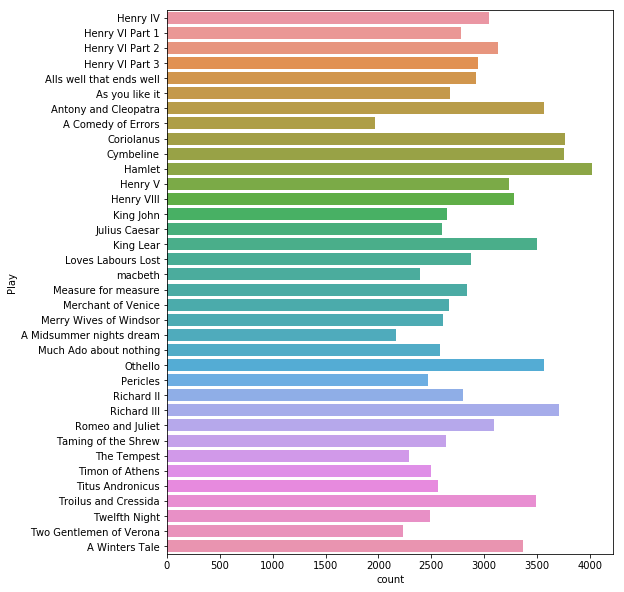

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(8,10))
ax = sns.countplot(y="Play", data=df)

A countplot is great because it displays the value counts for each play in our dataset. But it would be better if we could sort these values to make it more presentable -- let's make a quick change below!

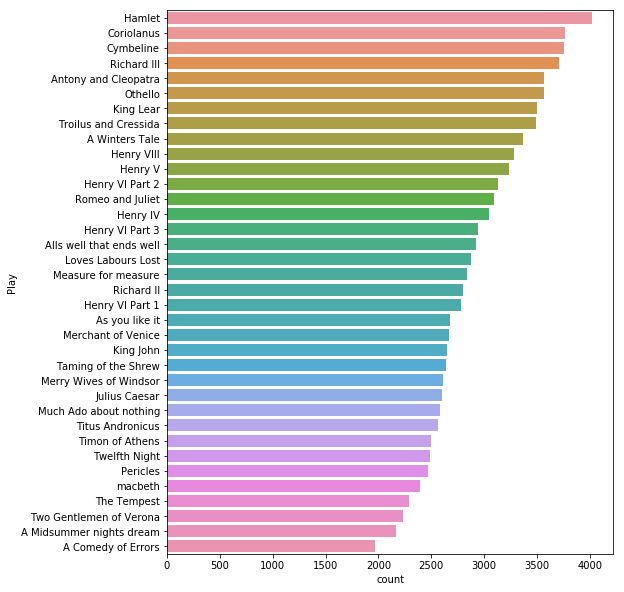

In [7]:
plt.figure(figsize=(8,10))
sns.countplot(y="Play", data=df, order=df["Play"].value_counts().index)

As we can see from the distribution of Shakespeare's Plays, 'Hamlet' has the highest value count and 'A Comedy of Errors' has the lowest value count.

Now let's try something a little different. Let's see if we can display the Number of Players for each Play. We can do this by using Pandas groupby() function, which splits the dataset into a group and the to_frame() function converts the Series into a DataFrame.

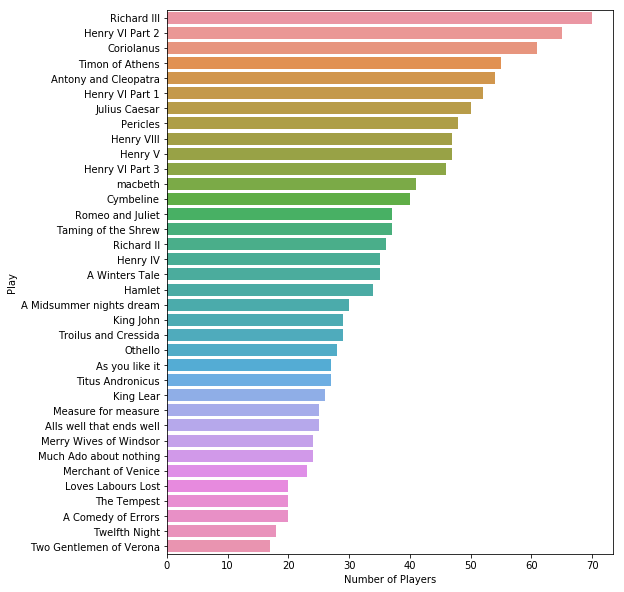

In [9]:
import numpy as  np

player_number = df.groupby(['Play'])['Player'].nunique().sort_values(ascending=False).to_frame()
player_number['Play'] = player_number.index.tolist()
player_number.columns = ['Number of Players','Play']
plt.figure(figsize=(8,10))
player_number.index = np.arange(0, len(player_number))
sns.barplot(x='Number of Players',y='Play',data=player_number)

We can seet that 'Richard III' has the most players and 'Two Gentlemen of Verona' has the least players.

Let's clean our data for our next visualization:
1. tokenize our text
2. lowercase the text if the text contains alphabetic characters 
3. replace punctuation in the text
4. remove stopwords from the text
5. apply 'clean' to PlayerLine


In [10]:
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def clean(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text if word.isalpha()]
    punct = str.maketrans('', '', string.punctuation)
    text = [word.translate(punct) for word in text]
    text = [word for word in text if not word in stopwords]
    return text

df['PlayerLine'] = df['PlayerLine'].apply(clean)

In [11]:
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"[shaken, wan, care]"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"[find, time, frighted, peace, pant]"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,"[breathe, accents, new, broils]"
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,"[commenced, strands, afar, remote]"
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,"[thirsty, entrance, soil]"


Now that we've cleaned the text, we'll create a column for the Number of Words for each line

In [12]:
df["Num_Words"] = df["PlayerLine"].apply(lambda x: len(x))

In [13]:
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Num_Words
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"[shaken, wan, care]",3
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"[find, time, frighted, peace, pant]",5
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,"[breathe, accents, new, broils]",4
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,"[commenced, strands, afar, remote]",4
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,"[thirsty, entrance, soil]",3


Let's do the same thing we did with the Number of Players. But this time, we'll visualize the Number of Words for each Player.

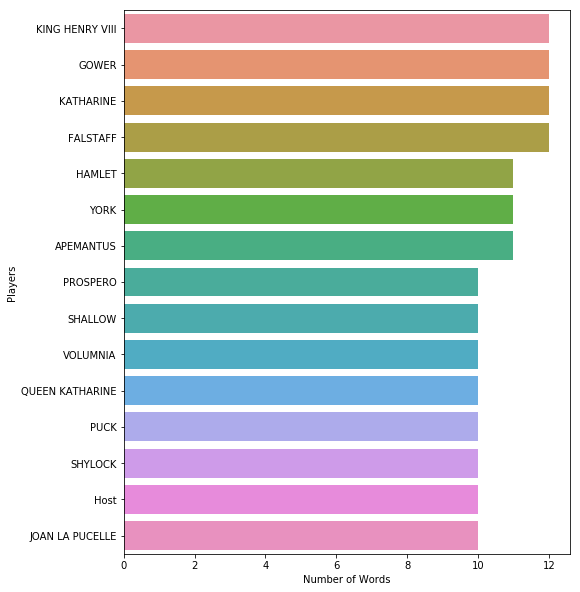

In [15]:
word_number = df.groupby(['Player'])['Num_Words'].nunique().sort_values(ascending = False).to_frame()
word_number['Player'] = word_number.index.tolist()
word_number = word_number[0:15]
word_number.columns = ['Number of Words','Players']
plt.figure(figsize=(8,10))
sns.barplot(x='Number of Words', y="Players",data=word_number)

Let's use Counter from collections to create a function that generates the most common words in our dataset.

In [16]:
from collections import Counter

def counter(text):
    cnt = Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg] += 1
    return cnt

text_cnt = counter(df['PlayerLine'])

In [17]:
text_cnt.most_common(5)

[('thou', 5184),
 ('thy', 3726),
 ('shall', 3471),
 ('thee', 3023),
 ('good', 2693)]

Now we'll create a DataFrame of Words and Counts that we created with our previous function. Then we'll visualize it with a barplot.

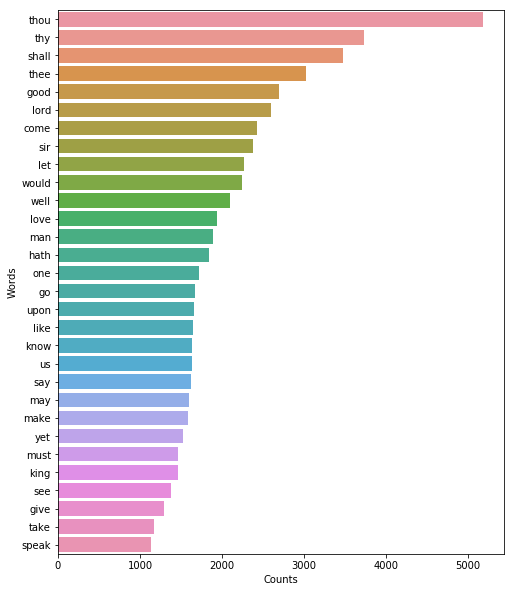

In [18]:
common_words = text_cnt.most_common(30)
common_words = pd.DataFrame(common_words, columns = ['Words', 'Counts'])
plt.figure(figsize=(8,10))
sns.barplot(y="Words", x="Counts", data=common_words)